In [91]:
import yfinance as yf
import pandas as pd

In [92]:
# Define ticker and date range
ticker = 'AMZN'
data = yf.download(ticker, period='3y')

[*********************100%***********************]  1 of 1 completed


In [93]:
# Reset index to get 'Date' as a column
data.reset_index(inplace=True)
data

Price,Date,Close,High,Low,Open,Volume
Ticker,,AMZN,AMZN,AMZN,AMZN,AMZN
0,2022-05-31,120.209503,121.994499,115.675003,116.279999,144634000
1,2022-06-01,121.683998,125.179001,120.622498,122.255997,127528000
2,2022-06-02,125.511002,125.610001,120.044998,121.683998,100560000
3,2022-06-03,122.349998,124.400002,121.046501,124.199997,97604000
4,2022-06-06,124.790001,128.990005,123.809998,125.250000,135269000
...,...,...,...,...,...,...
746,2025-05-21,201.119995,203.460007,200.059998,201.610001,42460900
747,2025-05-22,203.100006,205.759995,200.160004,201.380005,38938900
748,2025-05-23,200.990005,202.369995,197.850006,198.899994,33393500


In [94]:
# Keep only required columns
# data = data[['Date', 'High', 'Low']]
data.insert(0, 'Tickler', ticker)  # Insert 'Tickler' column at position 0

In [95]:
# Save to CSV
data.to_csv('amzn_data_last_3_years.csv', index=False)

In [96]:
print('✅ AMZN data for the last 3 years saved as amzn_data_last_3_years.csv')

✅ AMZN data for the last 3 years saved as amzn_data_last_3_years.csv


In [97]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [98]:
df = pd.read_csv('amzn_data_last_3_years.csv')

# Filter for AMZN ticker
amzn_df = df[df['Tickler'] == 'AMZN'].copy()

In [99]:
# Convert Date to datetime and sort
amzn_df['Date'] = pd.to_datetime(amzn_df['Date'])
amzn_df.sort_values('Date', inplace=True)
amzn_df

,Tickler,Date,Close,High,Low,Open,Volume
1,AMZN,2022-05-31,120.20950317382812,121.99449920654297,115.67500305175781,116.27999877929688,144634000
2,AMZN,2022-06-01,121.68399810791016,125.17900085449219,120.62249755859375,122.25599670410156,127528000
3,AMZN,2022-06-02,125.51100158691406,125.61000061035156,120.04499816894531,121.68399810791016,100560000
4,AMZN,2022-06-03,122.3499984741211,124.4000015258789,121.04650115966797,124.19999694824219,97604000
5,AMZN,2022-06-06,124.79000091552734,128.99000549316406,123.80999755859375,125.25,135269000
...,...,...,...,...,...,...,...
747,AMZN,2025-05-21,201.1199951171875,203.4600067138672,200.05999755859375,201.61000061035156,42460900
748,AMZN,2025-05-22,203.10000610351562,205.75999450683594,200.16000366210938,201.3800048828125,38938900
749,AMZN,2025-05-23,200.99000549316406,202.3699951171875,197.85000610351562,198.89999389648438,33393500
750,AMZN,2025-05-27,206.02000427246094,206.69000244140625,202.19000244140625,203.08999633789062,34892000


In [100]:
# Create new feature: Next day High (shifted)
amzn_df['Next_High'] = amzn_df['High'].shift(-1).astype(float)

# Drop last row with NaN Next_High
amzn_df = amzn_df[:-1]

# Features and target
X = amzn_df[['High', 'Low', 'Close', 'Open', 'Volume']]
y = amzn_df['Next_High']

# Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [101]:
# Build the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate performance
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')

y_pred

Mean Squared Error: 16.29


array([190.96357936, 190.78909099, 191.66575933, 186.74948238,
       188.14652524, 189.69570144, 190.07139622, 192.6627629 ,
       194.55969059, 188.41117062, 199.79047829, 197.53311838,
       201.37170567, 209.44967578, 212.14610767, 209.88747553,
       208.74335561, 210.67170953, 216.23834156, 213.55536818,
       204.84029628, 203.55908744, 206.78216174, 204.58966687,
       200.60436918, 198.87161489, 203.22307676, 209.99000229,
       207.47470901, 209.69104514, 212.62540517, 215.3651328 ,
       220.1529039 , 222.57809571, 229.20295643, 228.15351497,
       227.14077912, 232.29393974, 230.81079948, 229.41477393,
       234.84320861, 233.02800929, 223.31037874, 225.13751507,
       227.21273332, 226.87582594, 230.79942281, 228.69053732,
       225.6805848 , 223.26509263, 221.32810214, 222.51779293,
       226.06808738, 229.47817793, 224.36218556, 223.88459114,
       220.89055513, 220.20522571, 219.84834812, 225.02970444,
       222.60818769, 227.67781088, 232.6647072 , 236.91

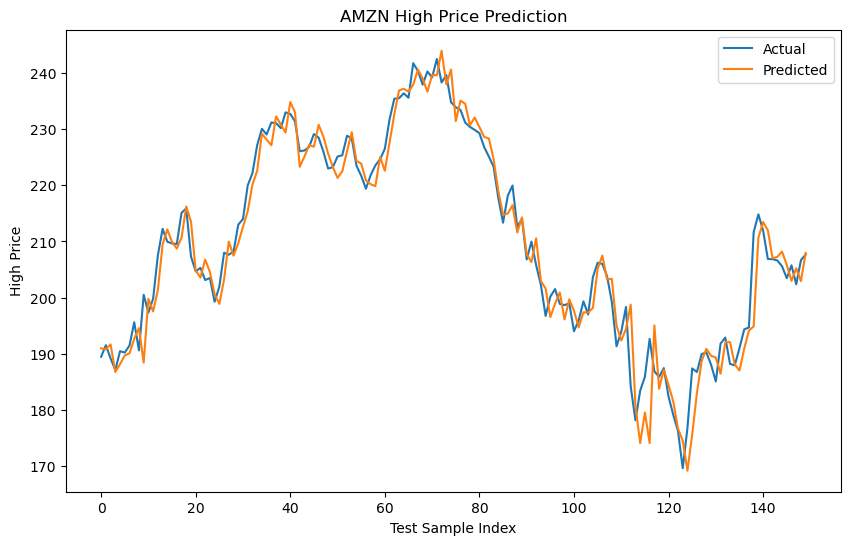

In [102]:
# Plot predictions vs. actual
plt.figure(figsize=(10,6))
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.title('AMZN High Price Prediction')
plt.xlabel('Test Sample Index')
plt.ylabel('High Price')
plt.legend()
plt.show()

In [103]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print(f'R-squared Score: {r2:.2f}')


R-squared Score: 0.95
